In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.normal(size=100)
y = 3 * x + 4 + np.random.normal(size= len(x))

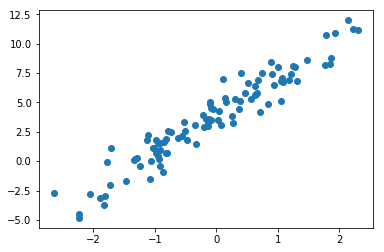

In [4]:
plt.scatter(x,y)

In [27]:
def gradient_descent(X_b,y,init_theta,eta = 0.01,iter_num = 1e4,eplison = 1e-8):
    
    def J(theta,X_b,y):
        return np.sum((X_b.dot(theta) - y) ** 2)
    
    def dJ(theta,X_b,y):
        res = np.empty(len(theta))
        res[0] = np.sum(X_b.dot(theta) - y)

        for i in range(1,len(theta)):
            res[i] =( X_b.dot(theta) - y).dot(X_b[:,i])
        return res * 2 / len(theta)
    
    
    theta = init_theta
    iter = 0
    while(iter < iter_num):
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - gradient * eta
        
        if np.abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < eplison:
            break
            
        iter += 1
        
    return theta
X = x.reshape(-1,1)
X_b = np.hstack([np.ones((len(X),1)),X])
init_theta = np.zeros(X_b.shape[1])
theta = gradient_descent(X_b,y,init_theta)

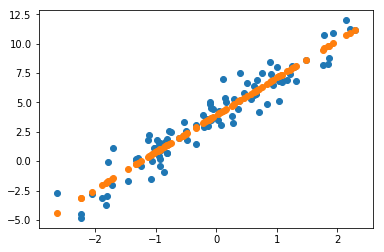

In [29]:
coef = theta[1]
interception = theta[0]
y_predict = x * coef + interception

y_predict = X_b.dot(theta)
plt.scatter(x,y)
plt.scatter(x,y_predict)